Before we train a model, we need to prepare the dataset.

First we download nearly 40MB examples of neutral and smiling faces.

In [ ]:
!curl -L -O https://github.com/hromi/SMILEsmileD/archive/master.zip
!unzip -q master.zip
!rm master.zip

Then we list all the image files, and create a big list of examples as `(path, class)` tuples.

In [1]:
from utils import list_all_files
negative_paths = list(list_all_files('SMILEsmileD-master/SMILEs/negatives/negatives7/', ['.jpg']))
print 'loaded', len(negative_paths), 'negative examples'
positive_paths = list(list_all_files('SMILEsmileD-master/SMILEs/positives/positives7/', ['.jpg']))
print 'loaded', len(positive_paths), 'positive examples'
examples = [(path, 0) for path in negative_paths] + [(path, 1) for path in positive_paths]

loaded 9475 negative examples
loaded 3690 positive examples


For each path, we will load the image with `imread` and resize from 64x64 to 32x32 with `block_reduce`. This can take up to **10 seconds**.

In [2]:
import numpy as np
from skimage.measure import block_reduce
from skimage.io import imread

def examples_to_dataset(examples, block_size=2):
    X = []
    y = []
    for path, label in examples:
        img = imread(path, as_grey=True)
        img = block_reduce(img, block_size=(block_size, block_size), func=np.mean)
        X.append(img)
        y.append(label)
    return np.asarray(X), np.asarray(y)

%time X, y = examples_to_dataset(examples)

CPU times: user 6.44 s, sys: 725 ms, total: 7.17 s
Wall time: 9.05 s


Then we turn `X` and `y` into numpy arrays and coerce them into the right shape and range.

In [3]:
X = X.astype(np.float32) / 255.
y = y.astype(np.int32)
print X.dtype, X.min(), X.max(), X.shape
print y.dtype, y.min(), y.max(), y.shape

float32 0.0 1.0 (13165, 32, 32)
int32 0 1 (13165,)


Let's take a look at a few of the images.

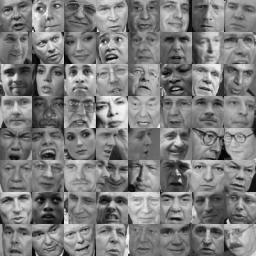

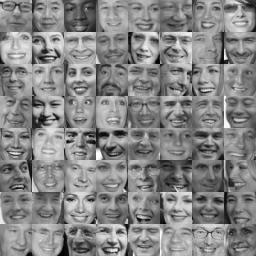

In [4]:
from utils import make_mosaic, show_array
show_array(255 * make_mosaic(X[:len(negative_paths)], 8), fmt='jpeg') # negative at the beginning
show_array(255 * make_mosaic(X[-len(positive_paths):], 8), fmt='jpeg') # positive at the end

Now we save the data to disk for so we can load it quickly when working with it later.

In [5]:
np.save('X.npy', X)
np.save('y.npy', y)